## This notebook provides a set of examples on how to use the numerical method for  problems on a sement.

In [14]:
#load modules

from matplotlib import pyplot as plt
import numpy as np
from spectral1d import solve_nonlinear_problem # needed module
from overscreening_breakdown import overscreening_breakdown_segment #needed module
%matplotlib inline

In [2]:
problem = overscreening_breakdown_segment()

In [3]:
#set up the problem.
#If a parameter is not given, then a default value is used instead. 
#See the source file of "overscreening_breakdown" for more details for defauls values

sigma = 20.0
mu = 0.36
gamma = 1
delta = 10.0
u0 = 1.0
u0xxx = 0

#use some function as initial guess for the root in the Newton's method.
def some_func(x):
    return u0*np.exp(-x)

#apply parameters
problem.set_parameters(sigma = sigma, mu = mu, gamma = gamma, delta = delta, u0 = u0, u0xxx=u0xxx, initial_guess_solution=some_func)

In [4]:
#in this case we set up the solver with the problem itself.
#so we no longer need to call the ".set_problem" method later.
#this is optional, so the solver can be constructed with either 'domain' or 'probem'
N = 100
tolerance = 1.0e-10
use_method = "newton"
use_adjoint_opimization = False
solver = solve_nonlinear_problem(N=N, problem = problem, tolerance=tolerance, use_method=use_method, use_adjoint_opimization = use_adjoint_opimization)

In [5]:
#pass the problem to the solver

# solver.set_problem(problem)
print("domain:", problem.get_domain()) #check, that we are loading a version with the finite segment domain
print("boundary:",problem.get_boundary_conditions()) #and with correct boundary conditions

domain: [0, 50]
boundary: [[1.0, None, None, 0, None], [0, 0, None, None, None]]


In [6]:
# solve the problem

c = solver.solve_problem()

newton: relative target tolerance = 1.009950e-09
newton: iteration  1 , residual norm 6.883874e-05 , weight = 1.000000e+00
newton: iteration  2 , residual norm 3.048691e-08 , weight = 1.000000e+00
newton: iteration  3 , residual norm 1.038249e-14 , weight = 1.000000e+00
converged with norm = 1.038249e-14


In [7]:
# solve the problem with adjoint optimization root preconditioning for the Newton's method.
# Note, that this variable can also be passed to the constructor
use_adjoint_opimization = True
solver.reset_base_solution() #resetting base solution to make sure we compute a new one
solver.use_adjoint_opimization(use_adjoint_opimization)
c_ao = solver.solve_problem()

Using initial guess update by the adjoint optimization.
newton: relative target tolerance = 1.009950e-09
newton: iteration  1 , residual norm 4.425591e-11 , weight = 1.000000e+00
converged with norm = 4.425591e-11


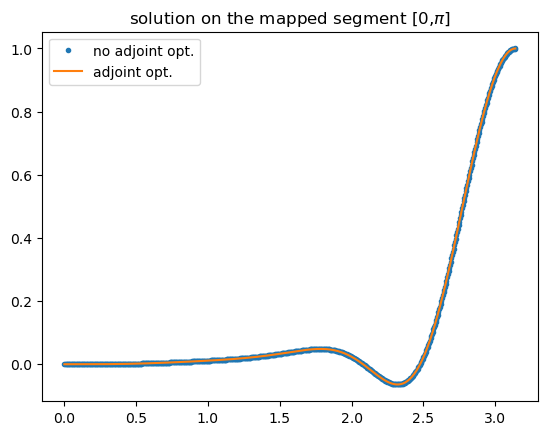

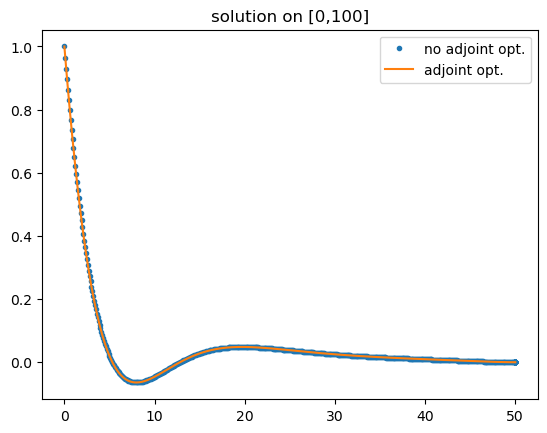

In [8]:
#plotting the solution in different domains

#plotting in computational domain in [0, $pi$]
t = np.arange(0, np.pi, 0.005) 
sol = solver.obtain_solution_in_basis(c, t)
sol_ao = solver.obtain_solution_in_basis(c_ao, t)
plt.title("solution on the mapped segment [0,$\pi$]")
plt.plot(t, sol,'.')
plt.plot(t, sol_ao)
plt.legend(["no adjoint opt.","adjoint opt."])
plt.show()

#plotting in physical domain for 0<=x<=100
x = np.arange(0.0, 100.0, 0.1)
sol = solver.obtain_solution_in_domain(c, x)
sol_ao = solver.obtain_solution_in_domain(c_ao, x)
plt.title("solution on [0,100]")
plt.plot(x, sol, '.')
plt.plot(x, sol_ao)
plt.legend(["no adjoint opt.","adjoint opt."])
plt.show()

Let's check the inifinite domain variant and compare it side by side

In [15]:
from overscreening_breakdown import overscreening_breakdown
problem_inf = overscreening_breakdown()

sigma = 20.0
mu = 0.36
gamma = 1
delta = 10.0
u0 = 1.0
u0xxx = 0

#use some function as initial guess for the root in the Newton's method.
def some_func(x):
    return u0*np.exp(-x)

#apply parameters
problem_inf.set_parameters(sigma = sigma, mu = mu, gamma = gamma, delta = delta, u0 = u0, u0xxx=u0xxx, initial_guess_solution=some_func)

In [16]:
N = 100
tolerance = 1.0e-10
use_method = "newton"
domain = [0,np.inf]
use_adjoint_opimization = True
L = 6 #on the sellection of this parameter, see bellow 
solver_inf = solve_nonlinear_problem(N=N, domain=domain, tolerance=tolerance, use_method=use_method, use_adjoint_opimization = use_adjoint_opimization)
solver_inf.set_mapping_parameter(L)
print("domain:", problem_inf.get_domain()) #check, that we are loading a version with the finite segment domain
print("boundary:",problem_inf.get_boundary_conditions()) #and with correct boundary conditions

domain: [0, inf]
boundary: [[1.0, None, None, 0, None], [None, None, None, None, None]]


In [17]:
solver_inf.set_problem(problem_inf)

In [18]:
c_inf = solver_inf.solve_problem()

Using initial guess update by the adjoint optimization.
newton: relative target tolerance = 1.009950e-09
newton: iteration  1 , residual norm 6.330256e-11 , weight = 1.000000e+00
converged with norm = 6.330256e-11


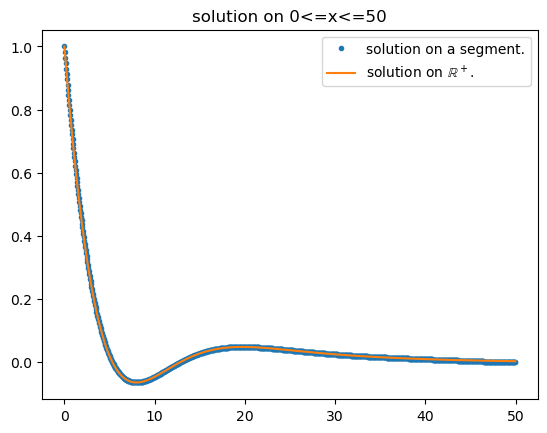

In [19]:
#plotting comparison in physical domain for 0<=x<=x_max
x_max = 50
x = np.arange(0.0, x_max, x_max/1000.0)
sol = solver.obtain_solution_in_domain(c, x)
sol_inf = solver_inf.obtain_solution_in_domain(c_inf, x)
plt.title("solution on 0<=x<={:.0f}".format(x_max))
plt.plot(x, sol, '.')
plt.plot(x, sol_inf)
plt.legend(["solution on a segment.","solution on $\mathbb{R}^+$."])
plt.show()

Let's solve some other problems on a segment...

In [ ]:
# to be continued